In [51]:
import json
from glob import glob
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

rdir = '../experiment/results_22-05-13/'

In [52]:
frames = []
# cols = [
#     'algorithm',
#     'random_state',
#     'time_time',
#        ]
for f in glob(rdir+'/*.json'):
#     print(f)
    with open(f,'r') as file:
        d = json.load(file)
    frames.append(d)    
df_results = pd.DataFrame.from_records(frames)
print(len(frames),'records')
print(frames[0].keys())


df_results.groupby('algorithm').count()

46 records
dict_keys(['dataset', 'algorithm', 'params', 'random_state', 'process_time', 'time_time', 'roc_auc_train', 'auprc_train', 'accuracy_train', 'MC_loss_train', 'PMC_loss_train', 'DC_loss_train', 'roc_auc_test', 'auprc_test', 'accuracy_test', 'MC_loss_test', 'PMC_loss_test', 'DC_loss_test'])


,dataset,params,random_state,process_time,time_time,roc_auc_train,auprc_train,accuracy_train,MC_loss_train,PMC_loss_train,DC_loss_train,roc_auc_test,auprc_test,accuracy_test,MC_loss_test,PMC_loss_test,DC_loss_test,feature_importances_
algorithm,,,,,,,,,,,,,,,,,,
xgb,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
xgb_cv,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0
xgb_mc,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0
xgb_mc_cv,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
xgb_pmc,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0
xgb_pmc_cv,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0


In [53]:

df_results.groupby('algorithm').mean().round(3)

,random_state,process_time,time_time,roc_auc_train,auprc_train,accuracy_train,MC_loss_train,PMC_loss_train,DC_loss_train,roc_auc_test,auprc_test,accuracy_test,MC_loss_test,PMC_loss_test,DC_loss_test
algorithm,,,,,,,,,,,,,,,
xgb,16129.000,31.338,259.059,0.912,0.837,0.846,0.187,1.456,2.995,0.889,0.795,0.827,0.232,1.262,2.996
xgb_cv,16129.000,24692.734,6029.057,0.901,0.818,0.836,0.174,1.297,2.996,0.891,0.799,0.828,0.243,1.973,2.996
xgb_mc,14807.778,91.236,281.753,0.906,0.825,0.842,0.121,0.757,2.995,0.886,0.789,0.825,0.215,1.054,2.995
xgb_mc_cv,11424.750,27650.422,13732.389,0.907,0.827,0.843,0.179,1.077,2.996,0.886,0.789,0.825,0.266,1.194,2.996
xgb_pmc,14807.778,117.441,487.786,0.906,0.825,0.842,0.121,0.762,2.995,0.886,0.789,0.825,0.240,1.136,2.995
xgb_pmc_cv,11424.750,32308.222,16788.862,0.906,0.826,0.842,0.179,1.080,2.996,0.886,0.788,0.825,0.252,1.278,2.990


In [54]:
metrics = ['roc_auc','auprc', 'MC_loss', 'PMC_loss', 'DC_loss' ]
test_metrics = [m+'_test' for m in metrics]
train_metrics = [m+'_train' for m in metrics]
# df_results.groupby('algorithm')[].mean().round(3)
df_results.groupby('algorithm')[test_metrics].mean().round(3)

,roc_auc_test,auprc_test,MC_loss_test,PMC_loss_test,DC_loss_test
algorithm,,,,,
xgb,0.889,0.795,0.232,1.262,2.996
xgb_cv,0.891,0.799,0.243,1.973,2.996
xgb_mc,0.886,0.789,0.215,1.054,2.995
xgb_mc_cv,0.886,0.789,0.266,1.194,2.996
xgb_pmc,0.886,0.789,0.240,1.136,2.995
xgb_pmc_cv,0.886,0.788,0.252,1.278,2.990


In [55]:
order = df_results.groupby('algorithm').groups.keys()

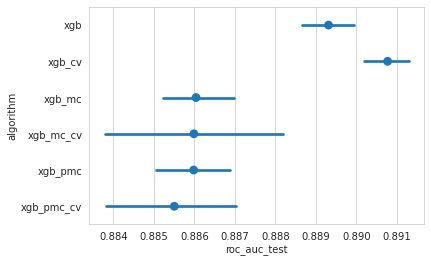

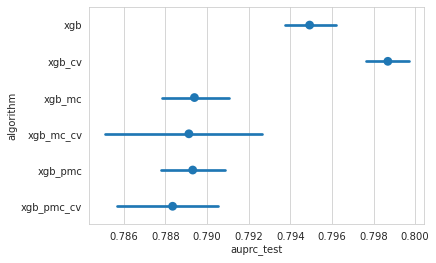

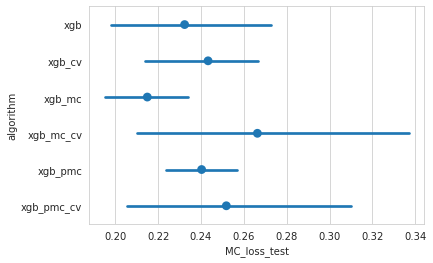

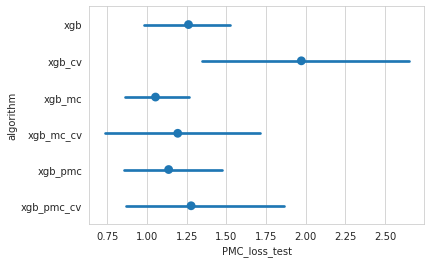

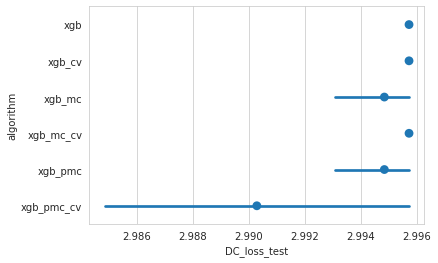

In [56]:
df_plt = df_results.copy()
    
for m in test_metrics:
    plt.figure()
    sns.pointplot(
        data=df_plt,
        y='algorithm',
        x=m,
        order=order,
        join=False
    )